In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams['font.family'] = 'AppleGothic'
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [303]:
data_dir = '/Volumes/Data/Row_Data'
fName_PD = 'kpx_power_demand_2023.csv'
fName_Temp = 'Temp_230101_240131.csv'
save_file = 'kpx_power_demand_addTemp_2023.csv'

In [23]:
date_range = pd.date_range('20230101', '20240101', freq='1H', inclusive ='left')
date_range

/var/folders/r5/124yntwj1n7_xfgvd8f6pzv40000gn/T/ipykernel_9309/1874718174.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range('20230101', '20240101', freq='1H', inclusive ='left')


DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='h')

In [105]:
url = f'{data_dir}/{fName_Temp}'
df_temp = pd.read_csv(url,  parse_dates=['date_time'], index_col = 'date_time' )
#df_temp = df_temp.loc[df_temp.date_time < '2024-01-01']
#df_temp.index = df_temp.date_time
df_temp.drop('Unnamed: 0', axis=1, inplace=True)
df_temp = df_temp[df_temp.index < '2024-01-01']
df_temp

,기온
date_time,
2023-01-01 00:00:00,-3
2023-01-01 01:00:00,-3
2023-01-01 02:00:00,-3
2023-01-01 03:00:00,-4
2023-01-01 04:00:00,-4
...,...
2023-12-31 19:00:00,1
2023-12-31 20:00:00,0
2023-12-31 21:00:00,0


In [106]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2023-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   기온      8760 non-null   int64
dtypes: int64(1)
memory usage: 136.9 KB


In [117]:
url = f'{data_dir}/{fName_PD}'
df_data = pd.read_csv(url, encoding='euc-kr')
df_data

,날짜,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2023-01-01,64322,61879,60133,59170,58813,59352,59971,60301,59890,...,52695,55879,60282,64447,66465,66199,66018,65477,65404,65676
1,2023-01-02,63083,60897,59751,59360,60127,62341,66729,74246,83138,...,78573,81324,84900,85269,83170,80813,78270,75816,75484,75299
2,2023-01-03,71842,69513,68141,67409,67797,69567,73423,79563,87110,...,80206,82581,86163,86690,84888,82717,79738,77372,77160,76931
3,2023-01-04,73087,70684,69165,68327,68569,70168,73743,79699,86766,...,80727,82873,85342,85151,83548,81754,79119,76907,76504,76197
4,2023-01-05,72474,70042,68646,67878,68126,69726,73520,79108,87276,...,82741,83862,85562,85427,83751,81791,78870,76334,75929,75685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,67443,64907,63407,62728,62978,64623,68371,74953,82260,...,74509,76839,79134,79587,77660,76382,74112,71759,71191,70404
361,2023-12-28,66678,64274,62744,62071,62440,63986,67723,73948,81147,...,74952,76768,78403,78716,77071,75549,73108,70693,70513,69960
362,2023-12-29,66283,63741,62155,61386,61802,63295,66721,72314,78244,...,70781,72101,72856,73271,72243,71253,69738,67790,68001,67552
363,2023-12-30,64267,61503,59987,59103,59104,59593,60870,62188,63275,...,64228,64685,64971,66025,65888,64934,63817,62436,63010,62981


In [118]:
columns = list(range(24))
columns.insert(0, 'date_time')
df_data.columns = columns
df_data

,date_time,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2023-01-01,64322,61879,60133,59170,58813,59352,59971,60301,59890,...,52695,55879,60282,64447,66465,66199,66018,65477,65404,65676
1,2023-01-02,63083,60897,59751,59360,60127,62341,66729,74246,83138,...,78573,81324,84900,85269,83170,80813,78270,75816,75484,75299
2,2023-01-03,71842,69513,68141,67409,67797,69567,73423,79563,87110,...,80206,82581,86163,86690,84888,82717,79738,77372,77160,76931
3,2023-01-04,73087,70684,69165,68327,68569,70168,73743,79699,86766,...,80727,82873,85342,85151,83548,81754,79119,76907,76504,76197
4,2023-01-05,72474,70042,68646,67878,68126,69726,73520,79108,87276,...,82741,83862,85562,85427,83751,81791,78870,76334,75929,75685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,67443,64907,63407,62728,62978,64623,68371,74953,82260,...,74509,76839,79134,79587,77660,76382,74112,71759,71191,70404
361,2023-12-28,66678,64274,62744,62071,62440,63986,67723,73948,81147,...,74952,76768,78403,78716,77071,75549,73108,70693,70513,69960
362,2023-12-29,66283,63741,62155,61386,61802,63295,66721,72314,78244,...,70781,72101,72856,73271,72243,71253,69738,67790,68001,67552
363,2023-12-30,64267,61503,59987,59103,59104,59593,60870,62188,63275,...,64228,64685,64971,66025,65888,64934,63817,62436,63010,62981


In [119]:
df_data.melt(id_vars=['date_time'])

,date_time,variable,value
0,2023-01-01,0,64322
1,2023-01-02,0,63083
2,2023-01-03,0,71842
3,2023-01-04,0,73087
4,2023-01-05,0,72474
...,...,...,...
8755,2023-12-27,23,70404
8756,2023-12-28,23,69960
8757,2023-12-29,23,67552
8758,2023-12-30,23,62981


In [120]:
df_data = df_data.melt(id_vars=['date_time']).sort_values(by=['date_time', 'variable'])
df_data

,date_time,variable,value
0,2023-01-01,0,64322
365,2023-01-01,1,61879
730,2023-01-01,2,60133
1095,2023-01-01,3,59170
1460,2023-01-01,4,58813
...,...,...,...
7299,2023-12-31,19,62902
7664,2023-12-31,20,62061
8029,2023-12-31,21,61403
8394,2023-12-31,22,61891


In [121]:
df_data.index = df_temp.index
df_data['base_time'] = df_temp.index
df_data['temp'] = df_temp.loc[:]['기온']
df_data.drop(columns=['date_time', 'variable'], inplace=True)
df_data

,value,base_time,temp
date_time,,,
2023-01-01 00:00:00,64322,2023-01-01 00:00:00,-3
2023-01-01 01:00:00,61879,2023-01-01 01:00:00,-3
2023-01-01 02:00:00,60133,2023-01-01 02:00:00,-3
2023-01-01 03:00:00,59170,2023-01-01 03:00:00,-4
2023-01-01 04:00:00,58813,2023-01-01 04:00:00,-4
...,...,...,...
2023-12-31 19:00:00,62902,2023-12-31 19:00:00,1
2023-12-31 20:00:00,62061,2023-12-31 20:00:00,0
2023-12-31 21:00:00,61403,2023-12-31 21:00:00,0


In [123]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2023-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   value      8760 non-null   int64         
 1   base_time  8760 non-null   datetime64[ns]
 2   temp       8760 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 273.8 KB


In [129]:
df_data['weekday'] = df_data['base_time'].dt.weekday
df_data['month'] = df_data['base_time'].dt.month
df_data['day'] = df_data['base_time'].dt.date
df_data['hr'] = df_data['base_time'].dt.hour
df_data

,value,base_time,temp,weekday,month,day,hr
date_time,,,,,,,
2023-01-01 00:00:00,64322,2023-01-01 00:00:00,-3,6,1,2023-01-01,0
2023-01-01 01:00:00,61879,2023-01-01 01:00:00,-3,6,1,2023-01-01,1
2023-01-01 02:00:00,60133,2023-01-01 02:00:00,-3,6,1,2023-01-01,2
2023-01-01 03:00:00,59170,2023-01-01 03:00:00,-4,6,1,2023-01-01,3
2023-01-01 04:00:00,58813,2023-01-01 04:00:00,-4,6,1,2023-01-01,4
...,...,...,...,...,...,...,...
2023-12-31 19:00:00,62902,2023-12-31 19:00:00,1,6,12,2023-12-31,19
2023-12-31 20:00:00,62061,2023-12-31 20:00:00,0,6,12,2023-12-31,20
2023-12-31 21:00:00,61403,2023-12-31 21:00:00,0,6,12,2023-12-31,21


In [132]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2023-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   value      8760 non-null   int64         
 1   base_time  8760 non-null   datetime64[ns]
 2   temp       8760 non-null   int64         
 3   weekday    8760 non-null   int32         
 4   month      8760 non-null   int32         
 5   day        8760 non-null   object        
 6   hr         8760 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(1)
memory usage: 444.8+ KB


In [135]:
df_data.temp.describe()

count    8760.000000
mean       12.764954
std        11.141786
min       -19.000000
25%         4.000000
50%        14.000000
75%        22.000000
max        34.000000
Name: temp, dtype: float64

In [ ]:
df_data['temp_boundary'] = df_data.temp.map(lambda x: )

In [286]:
def temp_boundary(x):
    if x <=4:
        return 1      
    elif x > 4 and x <=8:
        return 2
    elif x > 8 and x <=24:
        return 3 
    elif x > 24 and x <= 28:
        return 4    
    elif x > 28 and x <= 32:
        return 5    
    else:
        return 6


df_data['temp_boundary'] = df_data['temp'].map(temp_boundary)
df_data

,value,base_time,temp,weekday,month,day,hr,temp_boundary
date_time,,,,,,,,
2023-01-01 00:00:00,64322,2023-01-01 00:00:00,-3,6,1,2023-01-01,0,1
2023-01-01 01:00:00,61879,2023-01-01 01:00:00,-3,6,1,2023-01-01,1,1
2023-01-01 02:00:00,60133,2023-01-01 02:00:00,-3,6,1,2023-01-01,2,1
2023-01-01 03:00:00,59170,2023-01-01 03:00:00,-4,6,1,2023-01-01,3,1
2023-01-01 04:00:00,58813,2023-01-01 04:00:00,-4,6,1,2023-01-01,4,1
...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,62902,2023-12-31 19:00:00,1,6,12,2023-12-31,19,1
2023-12-31 20:00:00,62061,2023-12-31 20:00:00,0,6,12,2023-12-31,20,1
2023-12-31 21:00:00,61403,2023-12-31 21:00:00,0,6,12,2023-12-31,21,1


In [279]:
df_data.temp_boundary.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<Axes: xlabel='temp_boundary', ylabel='value'>

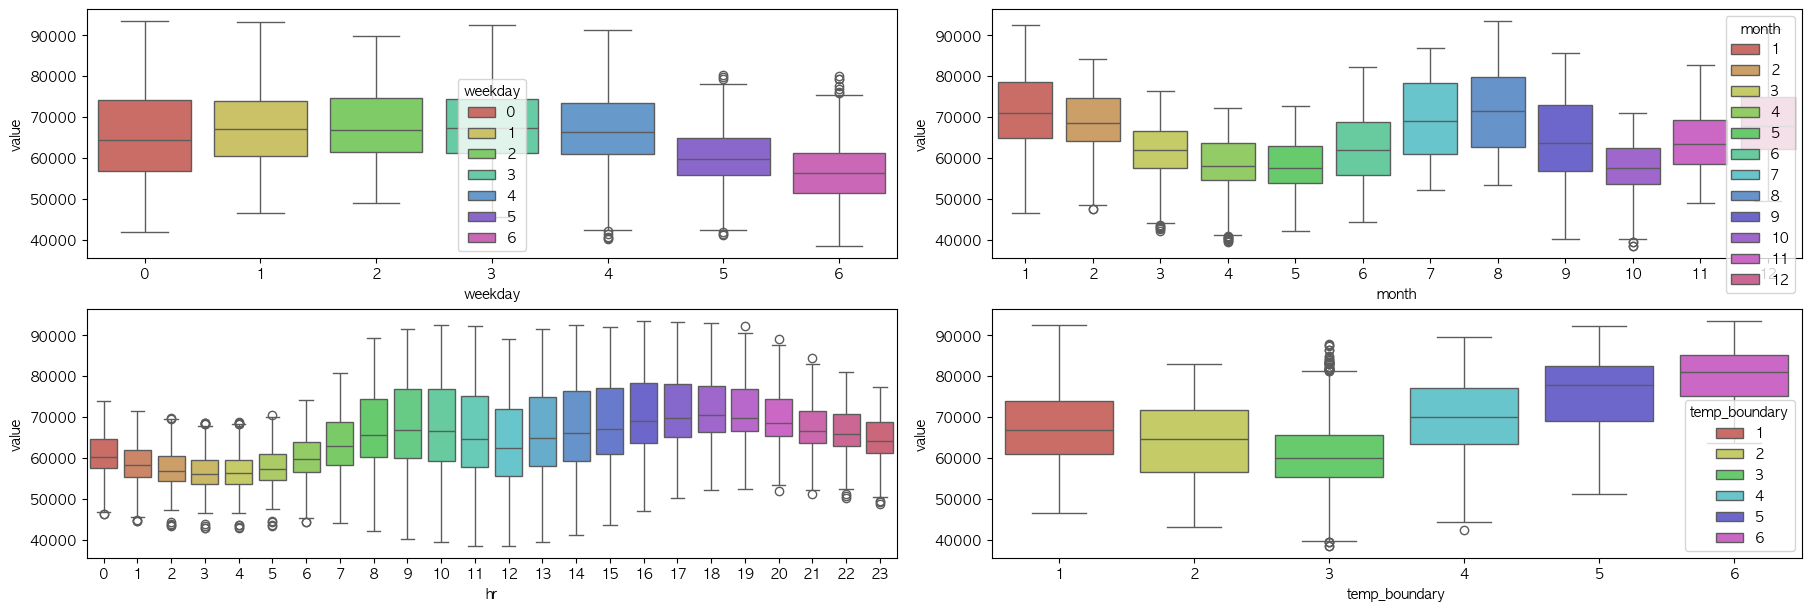

In [289]:
fig = plt.figure( figsize=(18,6), layout='constrained')
[[ax1,ax2],[ax3,ax4]] = fig.subplots(2,2)

sns.boxplot(x='weekday', y='value', data = df_data, order=[0,1,2,3,4,5,6], hue= 'weekday', ax=ax1, palette=sns.color_palette('hls', 7))

sns.boxplot(x='month', y='value', data = df_data, order=[1,2,3,4,5,6,7,8,9,10,11,12], hue= 'month', ax=ax2, palette=sns.color_palette('hls', 12))

sns.boxplot(x='hr', y='value', data = df_data, order=list(range(24)), hue= 'hr', ax=ax3, palette=sns.color_palette('hls', 24), legend=False)

sns.boxplot(x='temp_boundary', y='value', data = df_data, order=[1,2,3,4,5,6], hue='temp_boundary', ax=ax4, palette=sns.color_palette('hls', 6))

<Axes: xlabel='date_time'>

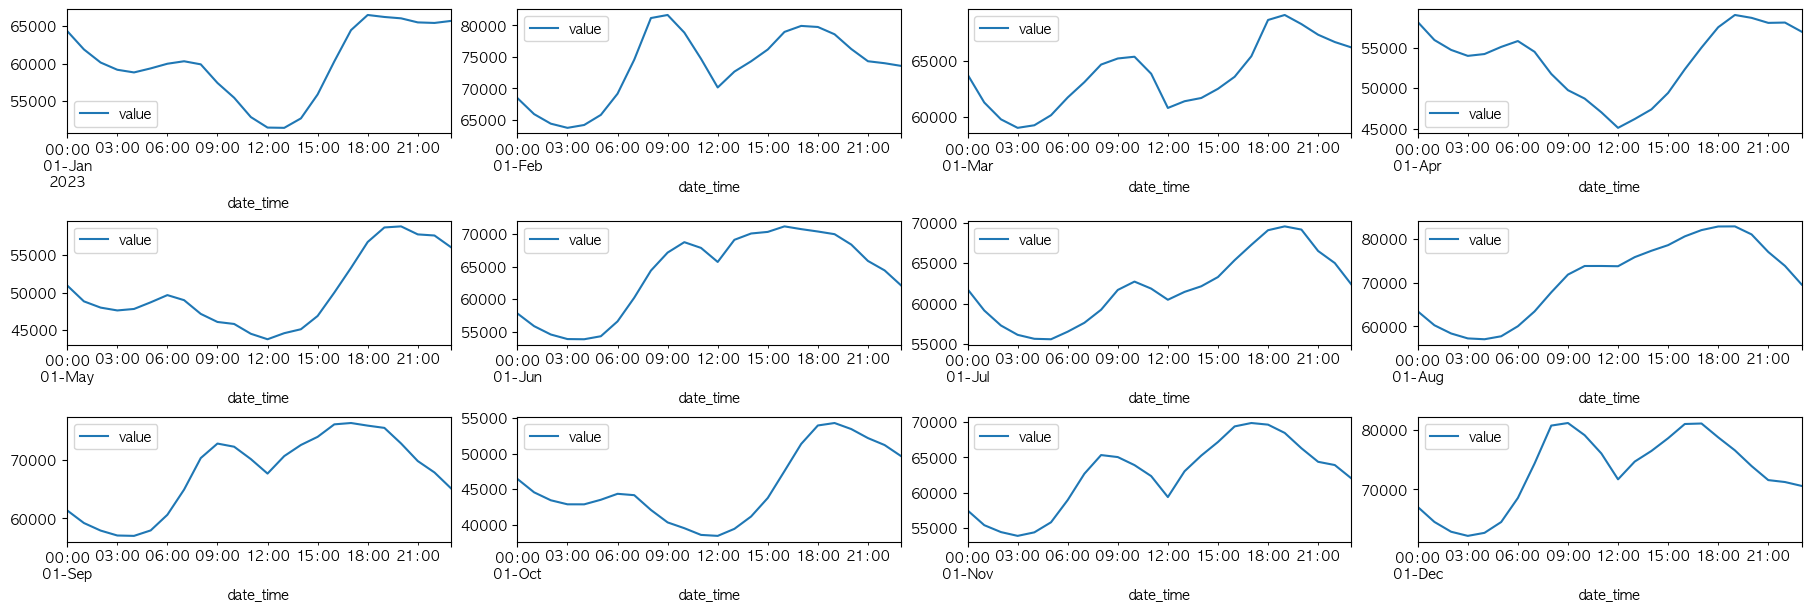

In [290]:
fig = plt.figure( figsize=(18,6), layout='constrained')
[[ax1,ax2, ax3,ax4],[ax5,ax6, ax7,ax8], [ax9,ax10, ax11,ax12]] = fig.subplots(3,4)

df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') == '2023-1-1'].plot(y='value',  ax=ax1)
df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') == '2023-2-1'].plot(y='value',  ax=ax2)
df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') == '2023-3-1'].plot(y='value',  ax=ax3)
df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') == '2023-4-1'].plot(y='value',  ax=ax4)
df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') == '2023-5-1'].plot(y='value',  ax=ax5)
df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') == '2023-6-1'].plot(y='value',  ax=ax6)
df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') == '2023-7-1'].plot(y='value',  ax=ax7)
df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') == '2023-8-1'].plot(y='value',  ax=ax8)
df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') == '2023-9-1'].plot(y='value',  ax=ax9)
df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') == '2023-10-1'].plot(y='value',  ax=ax10)
df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') == '2023-11-1'].plot(y='value',  ax=ax11)
df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') == '2023-12-1'].plot(y='value',  ax=ax12)

/var/folders/r5/124yntwj1n7_xfgvd8f6pzv40000gn/T/ipykernel_9309/571867000.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_data['value'].resample('M').sum().plot( y='value', ax=ax4)


<Axes: xlabel='date_time'>

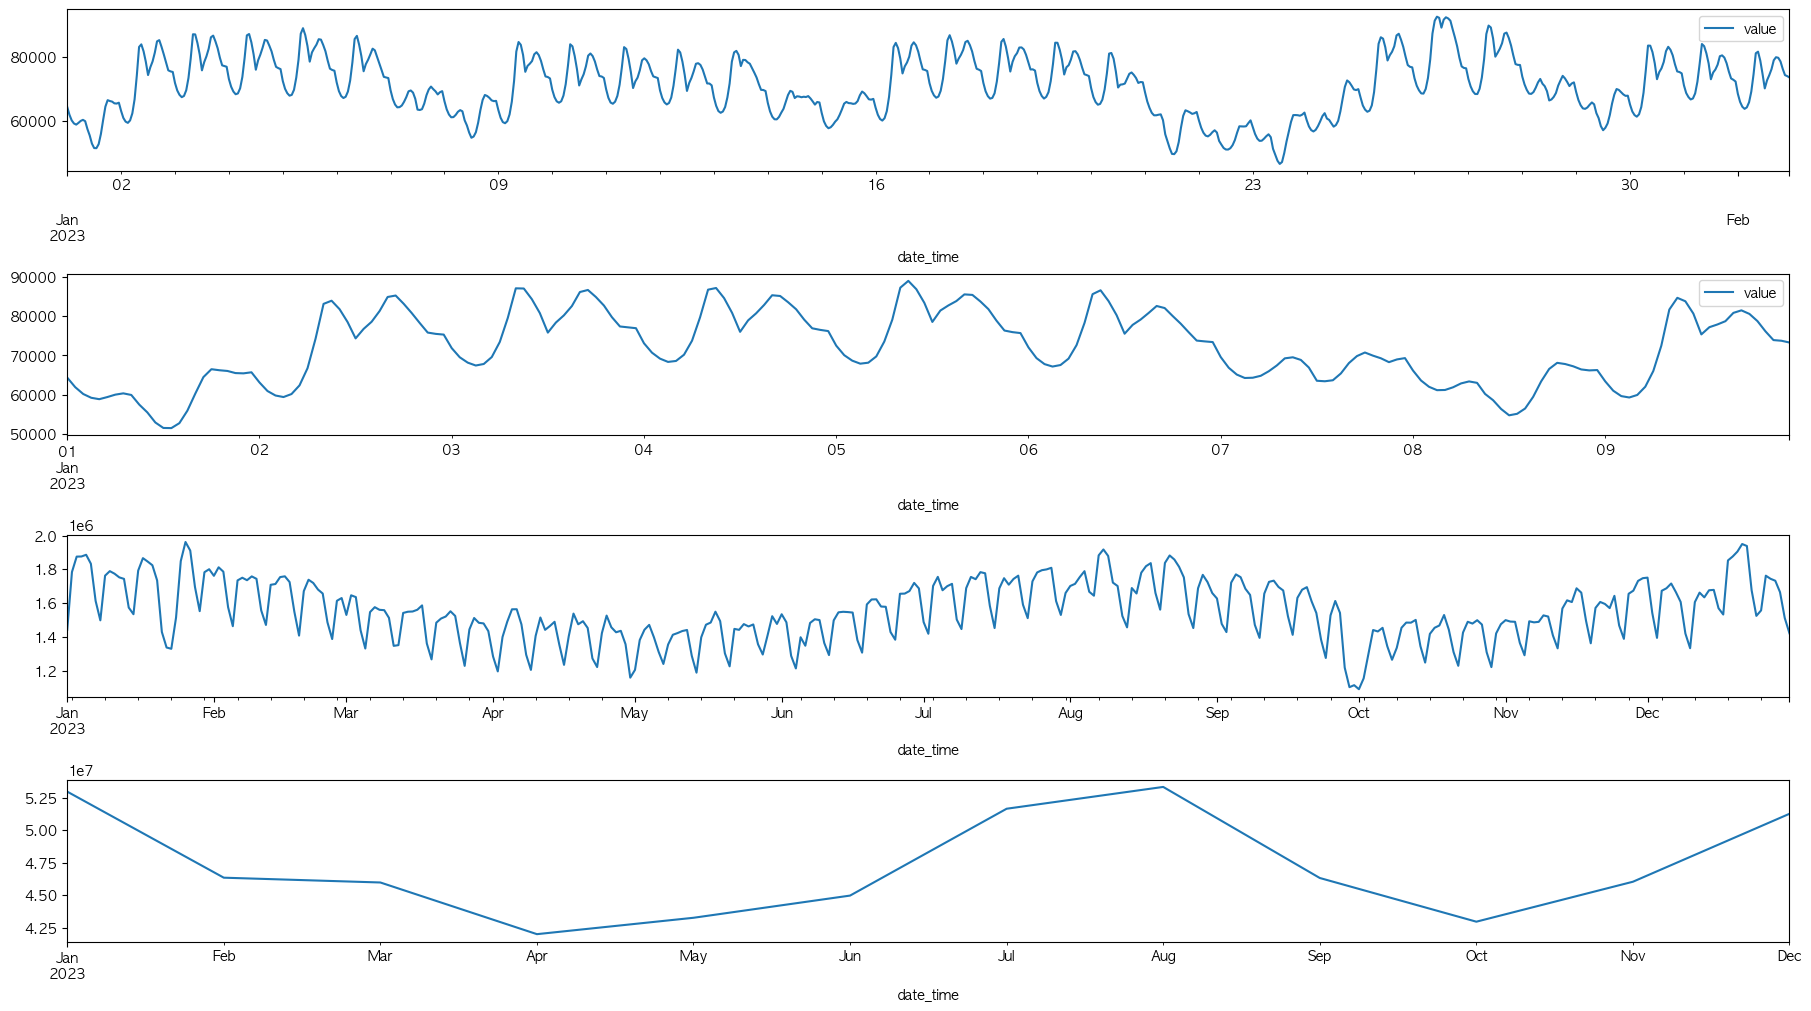

In [302]:
fig = plt.figure( figsize=(18,10), layout='constrained')
[ax1,ax2, ax3, ax4] = fig.subplots(4,1)
df_data['value'].resample('D').sum().plot( y='value',  ax=ax3)
df_data['value'].resample('M').sum().plot( y='value', ax=ax4)
df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') <= '2023-2-1'].plot(y='value',  ax=ax1)
df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') <= '2023-1-9'].plot(y='value',  ax=ax2)

In [306]:
filePath = f'{data_dir}/{save_file}'
df_data.to_csv(filePath)